In [22]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Data Cleaning

In [25]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        -------------- 

In [26]:
train['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [27]:
test['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [28]:
# For fuel_type column
import numpy as np

train['fuel_type'] = train['fuel_type'].replace('–', np.nan)
train['fuel_type'] = train['fuel_type'].fillna('Unknown')

test['fuel_type']  = test['fuel_type'].replace('–', np.nan)
test['fuel_type']  = test['fuel_type'].fillna('Unknown')

In [29]:
train['fuel_type'] = train['fuel_type'].replace('nan', np.nan)
train['fuel_type'] = train['fuel_type'].fillna('Unknown')

test['fuel_type']  = test['fuel_type'].replace('nan', np.nan)
test['fuel_type']  = test['fuel_type'].fillna('Unknown')

In [30]:
import re
import numpy as np
import pandas as pd

def parse_engine(x):
    if pd.isnull(x):
        return pd.Series([np.nan, np.nan, np.nan])

    # Horsepower
    hp = re.search(r'([\d\.]+)\s*HP', x)
    hp = float(hp.group(1)) if hp else np.nan

    # Engine size in Litres
    size = re.search(r'([\d\.]+)\s*L', x)
    size = float(size.group(1)) if size else np.nan

    # Cylinders
    cyl = re.search(r'(\d+)\s*Cylinder', x)
    cyl = int(cyl.group(1)) if cyl else np.nan

    return pd.Series([hp, size, cyl])

# Apply to both train and test
train[['horsepower','engine_size','cylinders']] = train['engine'].apply(parse_engine)
test[['horsepower','engine_size','cylinders']]  = test['engine'].apply(parse_engine)

In [31]:
train[['engine','horsepower','engine_size','cylinders']].head(10)

,engine,horsepower,engine_size,cylinders
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,172.0,1.6,4.0
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,252.0,3.9,8.0
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,320.0,5.3,8.0
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,420.0,5.0,8.0
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,208.0,2.0,4.0
5,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,252.0,2.0,4.0
6,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,333.0,3.0,6.0
7,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,355.0,5.3,8.0
8,2.7L V6 24V PDI DOHC Twin Turbo,NaN,2.7,NaN
9,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,425.0,3.0,6.0


In [32]:
# replace missing with mean, median or mode

train['horsepower'].fillna(train['horsepower'].median(), inplace=True)
train['engine_size'].fillna(train['engine_size'].median(), inplace=True)
train['cylinders'].fillna(train['cylinders'].mode()[0], inplace=True)

test['horsepower'].fillna(test['horsepower'].median(), inplace=True)
test['engine_size'].fillna(test['engine_size'].median(), inplace=True)
test['cylinders'].fillna(test['cylinders'].mode()[0], inplace=True)

/tmp/ipython-input-3022267661.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['horsepower'].fillna(train['horsepower'].median(), inplace=True)
/tmp/ipython-input-3022267661.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

for the accident column, convert the unique values into binary (0/1).

Handle missing values → assume 'None reported' (0)

hence, 0 = no accident / missing

1 = accident reported

In [33]:
train['accident_flag'] = train['accident'].map({
    "None reported": 0,
    "At least 1 accident or damage reported": 1
})

test['accident_flag'] = test['accident'].map({
    "None reported": 0,
    "At least 1 accident or damage reported": 1
})


# Handle missing values → assume 'None reported' (0)
train['accident_flag'].fillna(0, inplace=True)
test['accident_flag'].fillna(0, inplace=True)

/tmp/ipython-input-2127945824.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['accident_flag'].fillna(0, inplace=True)
/tmp/ipython-input-2127945824.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

for clean title i am making the null values to ne NO. and also converting them to binary. 1 = clean title

0 = not clean / missing

Why this works well:

It avoids treating blanks as “unknown” since the dataset structure already implies “No” when it isn’t “Yes.”

ML models perform better with clean binary features instead of messy text.

In [34]:
train['clean_title_flag'] = train['clean_title'].apply(lambda x: 1 if x == "Yes" else 0)

test['clean_title_flag'] = test['clean_title'].apply(lambda x: 1 if x == "Yes" else 0)

In [35]:
# For interior color

train['int_col'] = train['int_col'].replace("â€“", np.nan)
test['int_col'] = test['int_col'].replace("â€“", np.nan)

In [36]:
# For external color

train['ext_col'] = train['int_col'].replace("â€“", np.nan)
test['ext_col'] = test['int_col'].replace("â€“", np.nan)

In [37]:
print(train['transmission'].value_counts())
print(test['transmission'].value_counts())

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [38]:
# convert everything to lowercase

train['transmission'] = train['transmission'].str.lower().str.strip()
test['transmission'] = test['transmission'].str.lower().str.strip()

In [39]:
# grouping into category

def simplify_transmission(x):
    if pd.isna(x):
        return "unknown"
    if "manual" in x or "m/t" in x:
        return "manual"
    if "automatic" in x or "a/t" in x or "cvt" in x or "dct" in x:
        return "automatic"
    if "variable" in x or "cvt" in x:
        return "cvt"
    if "single-speed" in x:
        return "single_speed"
    if "overdrive" in x:
        return "automatic"
    if "scheduled" in x:
        return "unknown"
    if x in ["–", "2", "f", ""]:
        return "unknown"
    return "other"

train['transmission_simplified'] = train['transmission'].apply(simplify_transmission)
test['transmission_simplified'] = test['transmission'].apply(simplify_transmission)

In [40]:
print(train['transmission_simplified'].value_counts())
print(test['transmission_simplified'].value_counts())

transmission_simplified
automatic       152463
other            19381
manual           16358
unknown            249
cvt                 66
single_speed        16
Name: count, dtype: int64
transmission_simplified
automatic       101769
other            12911
manual           10785
unknown            155
cvt                 58
single_speed        12
Name: count, dtype: int64


In [41]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       188533 non-null  int64  
 1   brand                    188533 non-null  object 
 2   model                    188533 non-null  object 
 3   model_year               188533 non-null  int64  
 4   milage                   188533 non-null  int64  
 5   fuel_type                188533 non-null  object 
 6   engine                   188533 non-null  object 
 7   transmission             188533 non-null  object 
 8   ext_col                  188533 non-null  object 
 9   int_col                  188533 non-null  object 
 10  accident                 186081 non-null  object 
 11  clean_title              167114 non-null  object 
 12  price                    188533 non-null  int64  
 13  horsepower               188533 non-null  float64
 14  engi

In [42]:
"""
from google.colab import files

# save cleaned dataset to CSV
train.to_csv("cleaned_train_data.csv", index=False)
#test.to_csv("cleaned_test_data.csv", index=False)

# download it
files.download("cleaned_train_data.csv")
# files.download("cleaned_test_data.csv")

"""

'\nfrom google.colab import files\n\n# save cleaned dataset to CSV\ntrain.to_csv("cleaned_train_data.csv", index=False)\n#test.to_csv("cleaned_test_data.csv", index=False)\n\n# download it\nfiles.download("cleaned_train_data.csv")\n# files.download("cleaned_test_data.csv")\n\n'

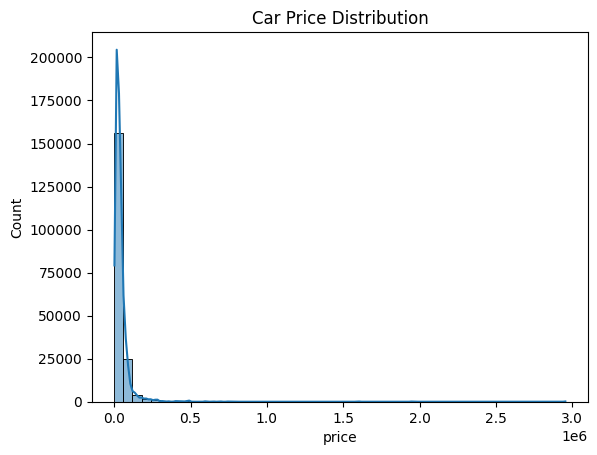

In [43]:
# Price distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['price'], bins=50, kde=True)
plt.title("Car Price Distribution")
plt.show()


In [44]:
# which brand sells higher

train.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)


,price
brand,
Bugatti,169600.000000
Lamborghini,159176.012361
Rolls-Royce,135488.650624
Bentley,129272.933333
McLaren,123261.238683
Ferrari,116751.005571
Aston,112364.588235
Rivian,81089.154237
Porsche,70899.947795


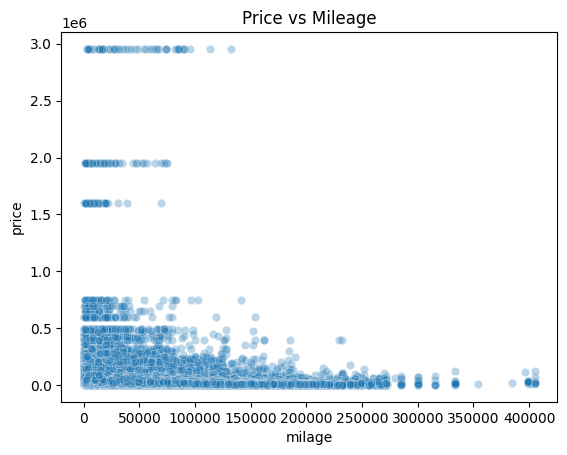

In [45]:
# Effect of Mileage

sns.scatterplot(x='milage', y='price', data=train, alpha=0.3)
plt.title("Price vs Mileage")
plt.show()

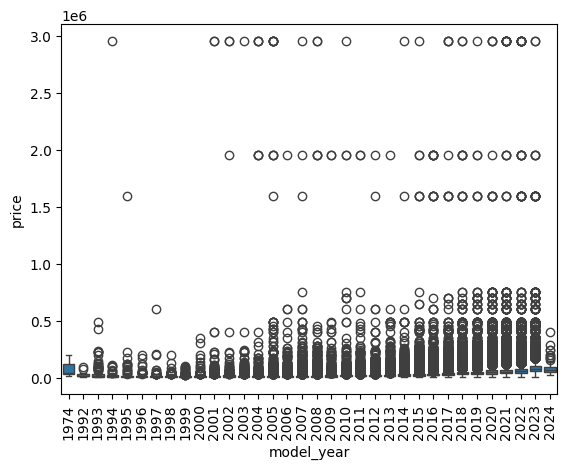

In [46]:
# model year vs price

sns.boxplot(x='model_year', y='price', data=train)
plt.xticks(rotation=90)
plt.show()

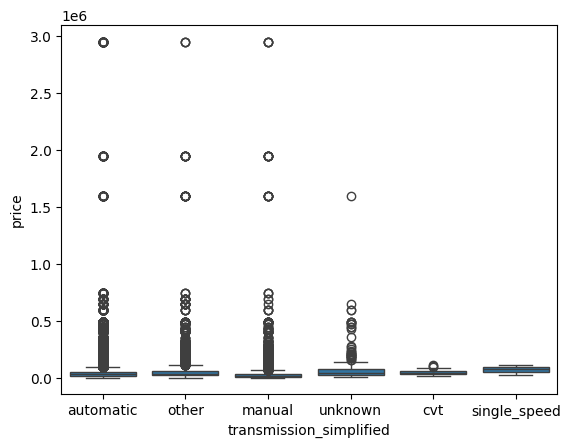

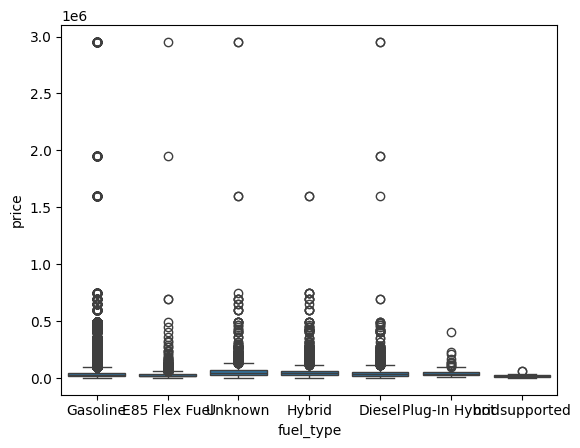

In [47]:
# Transmission & Fuel Type Impact
sns.boxplot(x='transmission_simplified', y='price', data=train)
plt.show()

sns.boxplot(x='fuel_type', y='price', data=train)
plt.show()

In [48]:
# correlation with horse power, engine size, and cylinders

train[['horsepower','engine_size','cylinders','price']].corr()

,horsepower,engine_size,cylinders,price
horsepower,1.000000,0.507254,0.639011,0.207837
engine_size,0.507254,1.000000,0.810308,0.090146
cylinders,0.639011,0.810308,1.000000,0.087329
price,0.207837,0.090146,0.087329,1.000000


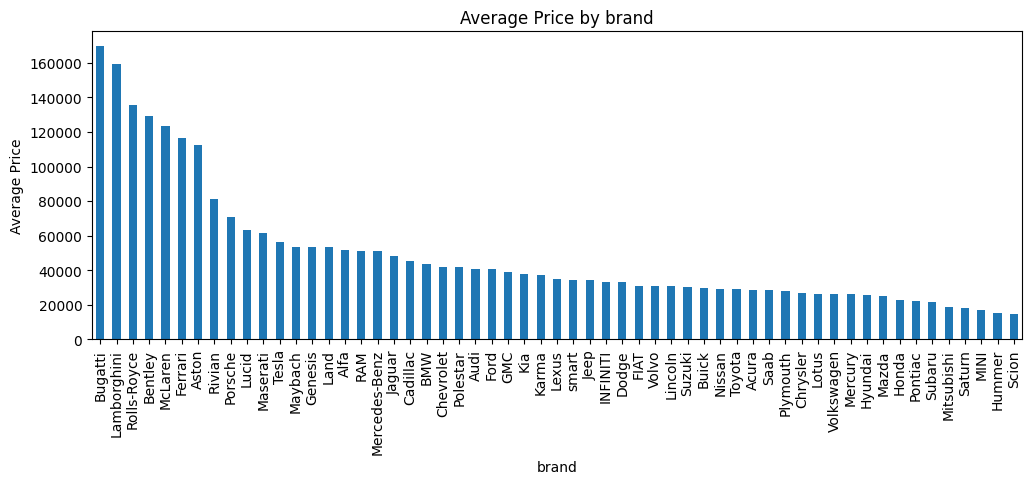

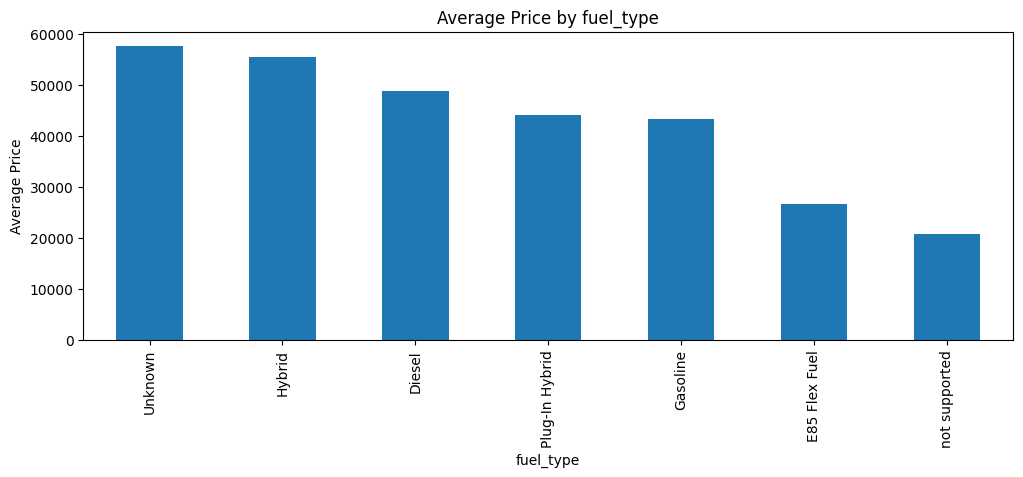

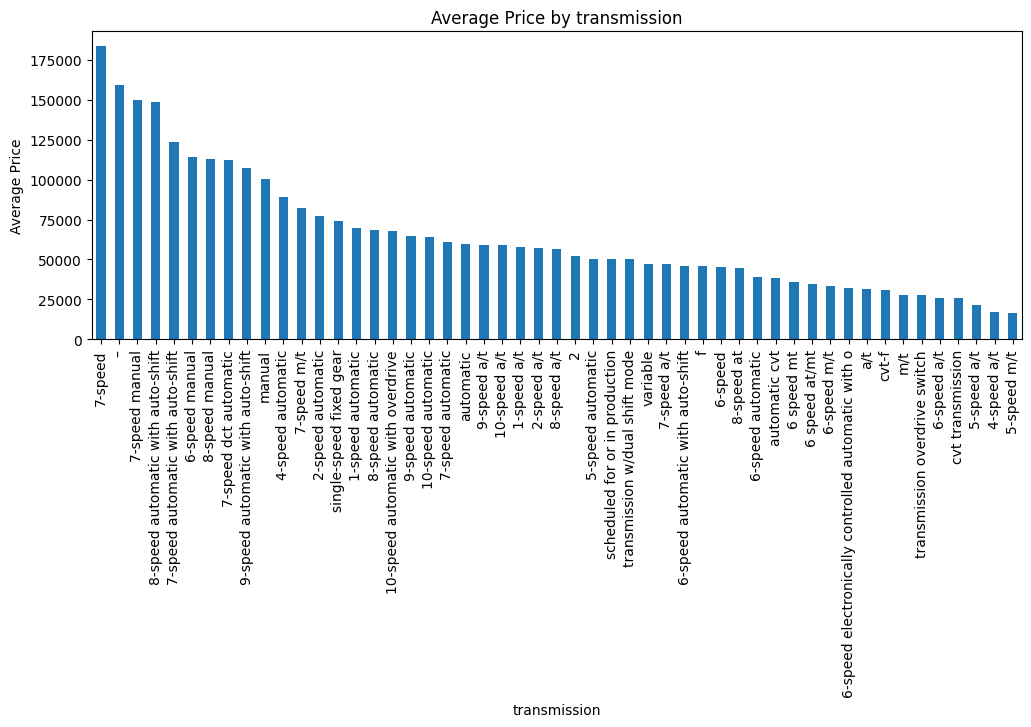

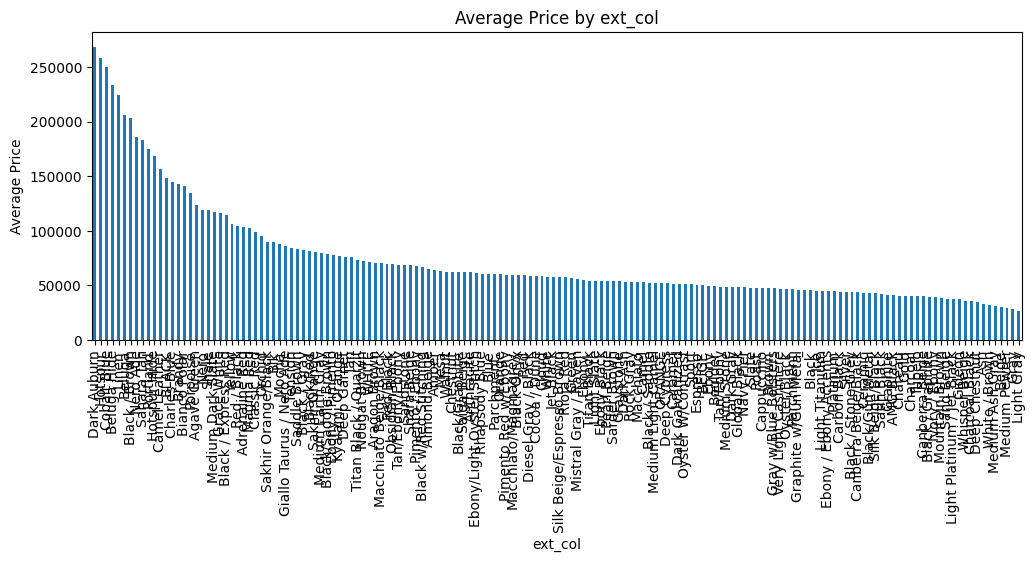

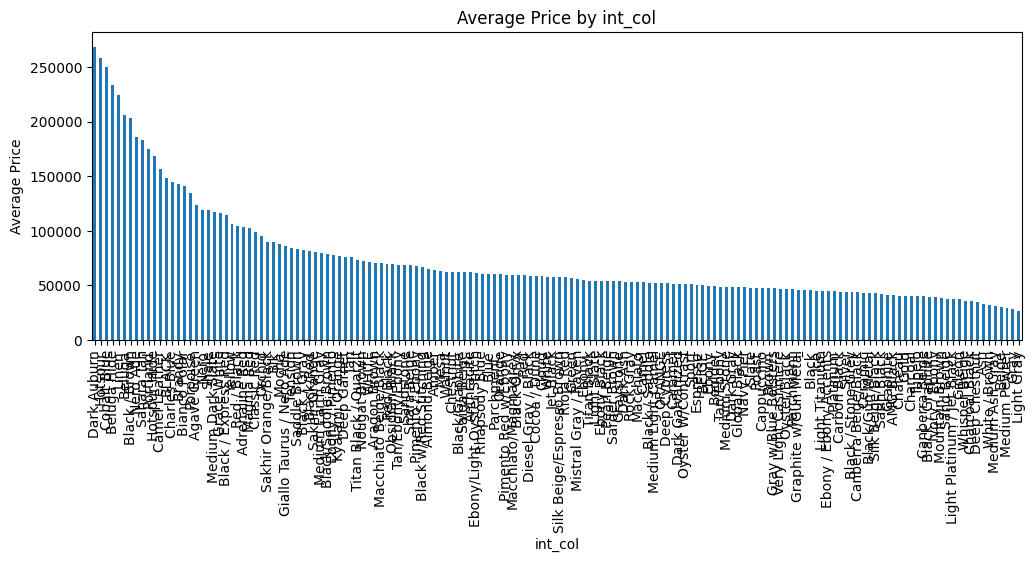

In [49]:
cat_cols = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col']
for col in cat_cols:
    avg_price = train.groupby(col)['price'].mean().sort_values(ascending=False)
    avg_price.plot(kind='bar', figsize=(12,4))
    plt.title(f'Average Price by {col}')
    plt.ylabel("Average Price")
    plt.show()


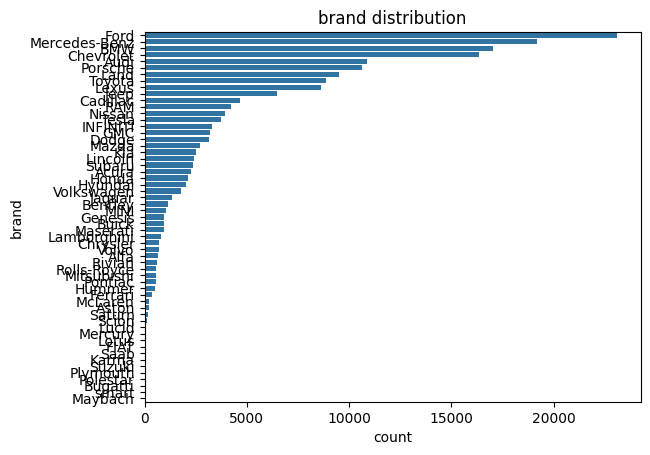

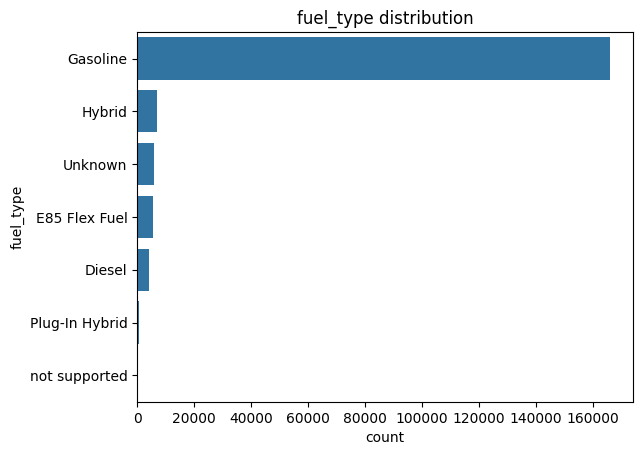

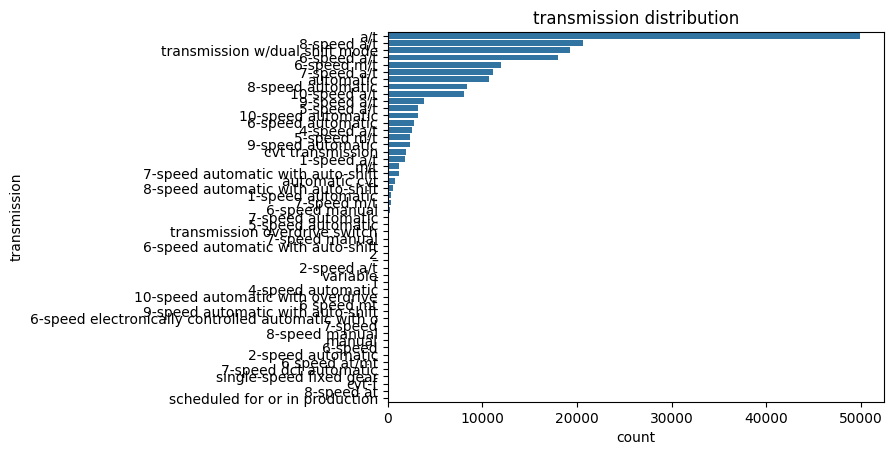

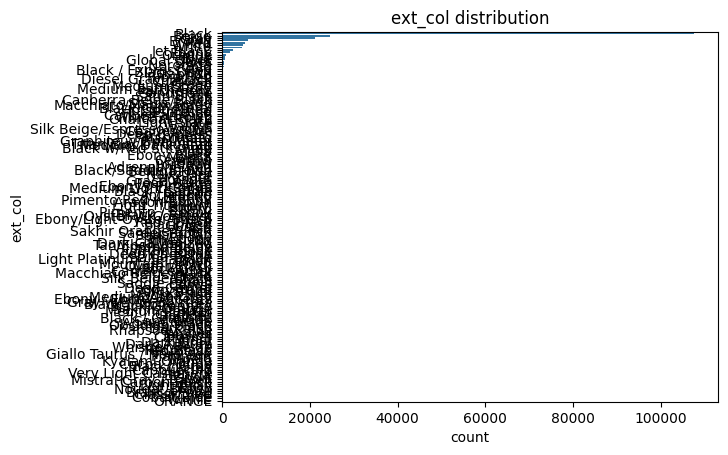

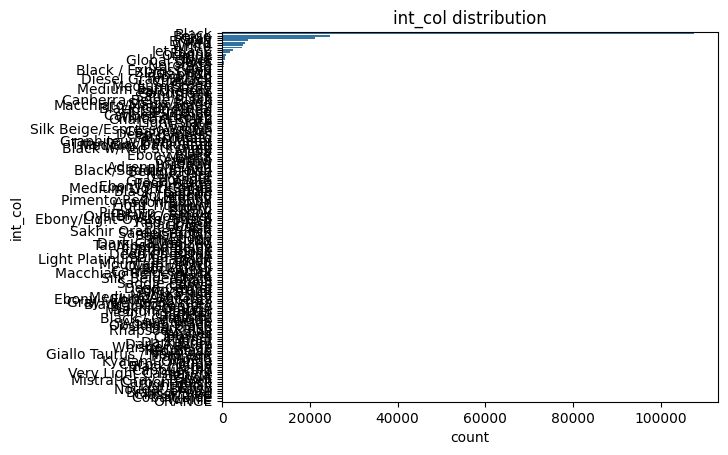

In [50]:
for col in cat_cols:
    sns.countplot(y=train[col], order=train[col].value_counts().index)
    plt.title(f'{col} distribution')
    plt.show()


MODEL TRAINING

In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
train = pd.read_csv("cleaned_train_data.csv")
test = pd.read_csv("cleaned_test_data.csv")

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       188533 non-null  int64  
 1   brand                    188533 non-null  object 
 2   model                    188533 non-null  object 
 3   model_year               188533 non-null  int64  
 4   milage                   188533 non-null  int64  
 5   fuel_type                188533 non-null  object 
 6   engine                   188533 non-null  object 
 7   transmission             188533 non-null  object 
 8   ext_col                  188533 non-null  object 
 9   int_col                  188533 non-null  object 
 10  accident                 186081 non-null  object 
 11  clean_title              167114 non-null  object 
 12  price                    188533 non-null  int64  
 13  horsepower               188533 non-null  float64
 14  engi

In [5]:
train = train.drop(["accident", "clean_title"], axis=1)
test = test.drop(["accident", "clean_title"], axis=1)

In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       188533 non-null  int64  
 1   brand                    188533 non-null  object 
 2   model                    188533 non-null  object 
 3   model_year               188533 non-null  int64  
 4   milage                   188533 non-null  int64  
 5   fuel_type                188533 non-null  object 
 6   engine                   188533 non-null  object 
 7   transmission             188533 non-null  object 
 8   ext_col                  188533 non-null  object 
 9   int_col                  188533 non-null  object 
 10  price                    188533 non-null  int64  
 11  horsepower               188533 non-null  float64
 12  engine_size              188533 non-null  float64
 13  cylinders                188533 non-null  float64
 14  acci

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [9]:
X = train.drop(columns=["price"])
y = train["price"]

In [10]:
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_features)

Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'transmission_simplified']


In [11]:
for c in cat_features:
    X[c] = X[c].astype(str)
    if c in test.columns:
        test[c] = test[c].astype(str)

In [12]:
# Align test columns to match train
X_test = test.drop(columns=["id"], errors="ignore")
X_test = X_test.reindex(columns=X.columns, fill_value="NA")

In [13]:
# Reconvert test categoricals again just in case
for c in cat_features:
    if c in X_test.columns:
        X_test[c] = X_test[c].astype(str)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
model = CatBoostRegressor(
    loss_function="RMSE",
    cat_features=cat_features,
    verbose=200,
    random_state=42
)

In [16]:
param_grid = {
    "depth": [6, 8],
    "learning_rate": [0.03, 0.05],
    "iterations": [300, 500],
    "l2_leaf_reg": [3, 5]
}

In [17]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)


In [18]:
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

0:	learn: 79570.5951127	total: 425ms	remaining: 3m 31s
200:	learn: 73136.2678484	total: 1m 10s	remaining: 1m 45s
400:	learn: 72665.8062815	total: 2m 6s	remaining: 31.3s
499:	learn: 72492.8880049	total: 2m 30s	remaining: 0us
Best parameters found: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.03}
Best CV RMSE: 73986.63666642796


In [19]:
best_model = CatBoostRegressor(
    **grid.best_params_,
    loss_function="RMSE",
    cat_features=cat_features,
    verbose=200,
    random_state=42
)

best_model.fit(X, y)

0:	learn: 78524.6895939	total: 833ms	remaining: 6m 55s
200:	learn: 72018.7837604	total: 1m 25s	remaining: 2m 6s
400:	learn: 71508.5126585	total: 2m 48s	remaining: 41.7s
499:	learn: 71302.4371873	total: 3m 29s	remaining: 0us


In [20]:
y_pred = best_model.predict(X_test)

In [21]:
# Create submission file

submission = pd.DataFrame({
    "id": test["id"],
    "price": y_pred
})

submission.to_csv("submission_catboost.csv", index=False)
print("✅Submission file created: submission12.csv")

✅ Submission file created: submission12.csv
